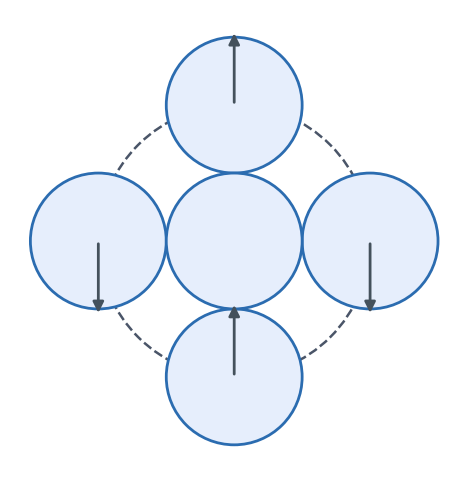

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_equal_quincunx_with_arrows(radius=1.0, arrow_len=None, savepath=None):
    """
    Five equal circles (radius = radius) in quincunx.
    Outer four are tangent to the center circle (centers at distance d=2*radius).
    Dashed guide circle goes through the outer centers.
    Arrows start at the CENTER of each outer circle:
        top & bottom: upwards; left & right: downwards.
    The dashed guide is rendered BEHIND the disks (hidden where overlapped).
    """
    s = float(radius)
    if s <= 0:
        raise ValueError("radius must be positive.")

    d = 2.0 * s
    if arrow_len is None:
        arrow_len = 1.1 * s

    centers = {
        "top":    (0.0,  d),
        "right":  ( d,  0.0),
        "bottom": (0.0, -d),
        "left":   (-d,  0.0),
        "center": (0.0,  0.0),
    }

    # z-order: guide (1) < circles (3) < arrows (4)
    z_guide, z_circles, z_arrows = 1, 3, 4

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.axis('off')

    # --- dashed guide circle FIRST (behind) ---
    ax.add_patch(Circle((0.0, 0.0), d, ec="#4a5568", fc="none",
                        lw=1.8, ls="--", zorder=z_guide))

    # --- disks on top of guide (opaque facecolors hide the dashed where overlapped) ---
    for key in ["top", "right", "bottom", "left", "center"]:
        cx, cy = centers[key]
        ax.add_patch(Circle((cx, cy), s, ec="#2b6cb0", fc="#e6eefc",
                            lw=2, zorder=z_circles))

    # --- arrows on top ---
    def vertical_arrow_from_center(cx, cy, direction):
        if direction == "up":
            start, end = (cx, cy), (cx, cy + arrow_len)
        elif direction == "down":
            start, end = (cx, cy), (cx, cy - arrow_len)
        else:
            raise ValueError("direction must be 'up' or 'down'")
        a = FancyArrowPatch(
            start, end, arrowstyle='-|>', mutation_scale=16,
            lw=2.0, color='#44515c', zorder=z_arrows
        )
        ax.add_patch(a)

    vertical_arrow_from_center(*centers["top"],    "up")
    vertical_arrow_from_center(*centers["bottom"], "up")
    vertical_arrow_from_center(*centers["left"],   "down")
    vertical_arrow_from_center(*centers["right"],  "down")

    # limits include arrows
    pad = 0.3 * s
    x_pad = s + pad
    y_pad = max(s, arrow_len) + pad
    ax.set_xlim(-d - x_pad, d + x_pad)
    ax.set_ylim(-d - y_pad, d + y_pad)

    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    plt.close(fig)

# Example:
draw_equal_quincunx_with_arrows(radius=1.0, arrow_len=1.1)
